
## Theory ##

Let's say, we have data $X$, which is a matrix of $N$ values, each having
dimensionality $p$.
Then the covariance matrix $\Sigma$ of $X$ can be computed as:
$$\Sigma = \frac{X^T X}{N-1}$$

### Eigenvalues of covariance matrix ###
We can represent $\Sigma$ as a decomposition using its **eigenvalue decomposition**:

$$\Sigma = V L V^{-1}$$

where $V$ is a matrix of eigenvectors and $L$ is a diagonal matrix of
eigenvalues. For every *covariance matrix* $\Sigma$ the matrix $V$ will
actually be a rotation and thus, $V^{-1} = V^T$. Thus:

$$\Sigma = VLV^{T}$$

You can see an example of getting the eigenvalues from a covariance matrix in
function `plot_cov_ellipse`.

### Relation to SVD ###
We can express our data $X$ as a decomposition using **SVD**:

$$ X = \mathrm{SVD}(X) = USV^T $$

where $U$ is a unitary matrix that holds left-singular vectors, $S$ is a
diagonal matrix of singular values and $V$ is a unitary matrix of
right-singular vectors.

The matrix $V$ is the same as the matrix $V$ from eigenvalue decomposition of
$\Sigma$.

This allows us to find the correspondence between singular values of $X$ to the
eigenvalues of $\Sigma$.

$$ \Sigma = \frac{X^T X}{N-1} = \frac{(USV^T)^T (USV^T)}{N-1} = \frac{VSU^{T} USV^T}{N-1} = V \frac{S^2}{N-1} V^T$$

This looks exactly like the eigenvalue decomposition of the covariance matrix $\Sigma$:

$$ V \frac{S^2}{N-1} V^T = VLV^{T} \Rightarrow L = \frac{S^2}{N-1} $$

### SVD of covariance matrix ###
Singular values *of the covariance matrix $\Sigma$* are the same as its eigenvalues. The code to check this is in function `compare_eigen_svd`.





In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display, Math, Latex, Markdown

In [25]:
def plot_cov_ellipse(data, pos, nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        W, V = np.linalg.eig(cov)
        order = W.argsort()[::-1]
        return W[order], V[:,order]
    
    cov = np.cov(data, rowvar=False)

    if ax is None:
        ax = plt.gca()

    W, V = eigsorted(cov)
    display(Markdown('# Eigenvalue decomposition #'))
    print("eigen vals:", W)
    print("eigen vectors:\n", V)
    theta = np.degrees(np.arctan2(*V[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(W)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    ax.set_title('From eigenvalues')
    return ellip

In [49]:
def plot_svd_ellipse(data, pos, nstd=2, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    centered_data = data - pos
    U, S, V_T = np.linalg.svd(centered_data)
    V = V_T.T
    display(Markdown('# SVD decomposition #'))
    print("singular vals:", S)
    print("singular vectors:\n", V)
    theta = np.degrees(np.arctan2(*V[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * (S / np.sqrt(data.shape[0]))
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    ax.set_title('From singular values')
    return ellip

In [57]:
def compare_eigen_svd(data):
    display(Markdown('# Eigenvalues vs singular values of a cov matrix #'))
    display(Markdown('The eigenvalues should be the same as singular values '
                     'when `eig` and `SVD` are applied to a covariance matrix $\Sigma$'))
    cov = np.cov(data, rowvar=False)
    W, V_eig = np.linalg.eig(cov)
    U, S, V_svd = np.linalg.svd(cov)
    display(Markdown('### Eigenvalues of $\Sigma$'))
    print(W)
    display(Markdown('### Singular values of $\Sigma$'))
    print(S)

# Eigenvalue decomposition #

eigen vals: [ 35.66029313  10.04952904]
eigen vectors:
 [[-0.50231364 -0.8646855 ]
 [-0.8646855   0.50231364]]


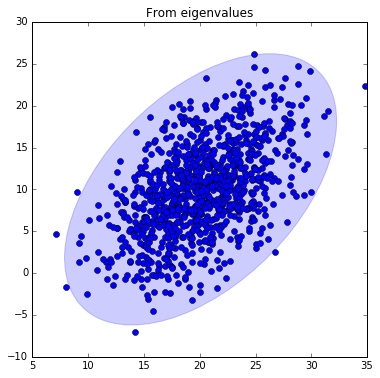

# SVD decomposition #

singular vals: [ 188.74488825  100.19720309]
singular vectors:
 [[-0.50231364 -0.8646855 ]
 [-0.8646855   0.50231364]]


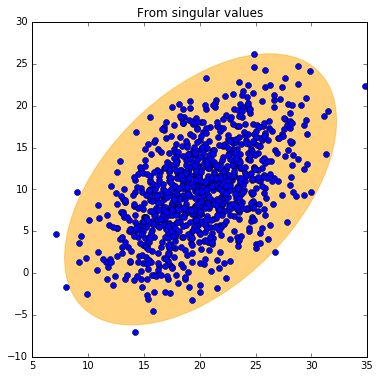

# Eigenvalues vs singular values of a cov matrix #

The eigenvalues should be the same as singular values when `eig` and `SVD` are applied to a covariance matrix $\Sigma$

### Eigenvalues of $\Sigma$

[ 10.04952904  35.66029313]


### Singular values of $\Sigma$

[ 35.66029313  10.04952904]


In [58]:
# Generate some random, correlated data
points = np.random.multivariate_normal(mean=(20,10), cov=[[18, 12],[12, 30]], size=1000)
pos = points.mean(axis=0)
plot_size = (6,6)
x, y = points.T
fig = plt.figure(0, figsize=plot_size)
ax = fig.add_subplot(111)
ax.plot(x, y, 'bo')
plot_cov_ellipse(points, pos, nstd=3, alpha=0.2, color='blue')
plt.show()

fig = plt.figure(1, figsize=plot_size)
ax = fig.add_subplot(111)
ax.plot(x, y, 'bo')
plot_svd_ellipse(points, pos, nstd=3, alpha=0.5, color='orange')
plt.show()

# compare eigen values and singular values of a cov matrix
compare_eigen_svd(points)